In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
euro_c_df_clean = pd.read_csv('euro_c_df_clean.csv')

intercept = 4.257, slope = -0.001


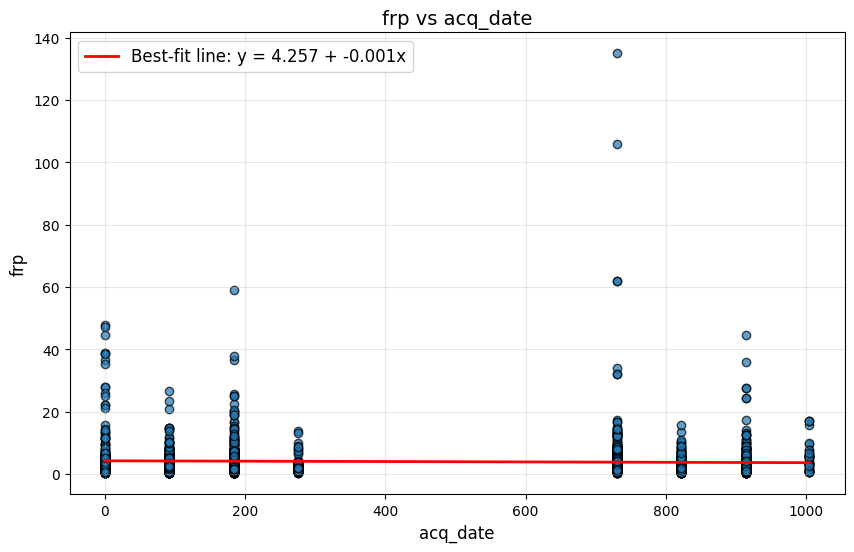

In [44]:
# acq_date as the feature variable doesn't produce a good linear model

x_df = euro_c_df_clean['acq_date']
x_datetime = pd.to_datetime(x_df)
reference_date = pd.Timestamp(x_df.min())                       # earliest date, '2020-03-01'
x_timedelta = x_datetime - reference_date

# number of days between data collection and reference date
x_days = x_timedelta.dt.days

x = x_days.to_numpy()                                           # x: days since 2020-03-01
X = np.hstack([np.ones((x.shape[0], 1)), x.reshape(-1, 1)])     # X has a bias (1's) column
y = euro_c_df_clean['frp'].to_numpy()                           # y: frp

# solves (X^T X) m = (X^T y) for m
m = np.linalg.solve(np.matmul(X.T, X), np.matmul(X.T, y))

print(f'intercept = {round(m[0], 3)}, slope = {round(m[1], 3)}')

# scatterplot of frp vs acq_date with best-fit line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7, edgecolor='k')
plt.plot(x, m[0] + m[1] * x, color='red', linewidth=2, label=f'Best-fit line: y = {round(m[0], 3)} + {round(m[1], 3)}x')  # Best-fit line
plt.title('frp vs acq_date', fontsize=14)
plt.xlabel('acq_date', fontsize=12)
plt.ylabel('frp', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

intercept = -41.292, slope = 0.141


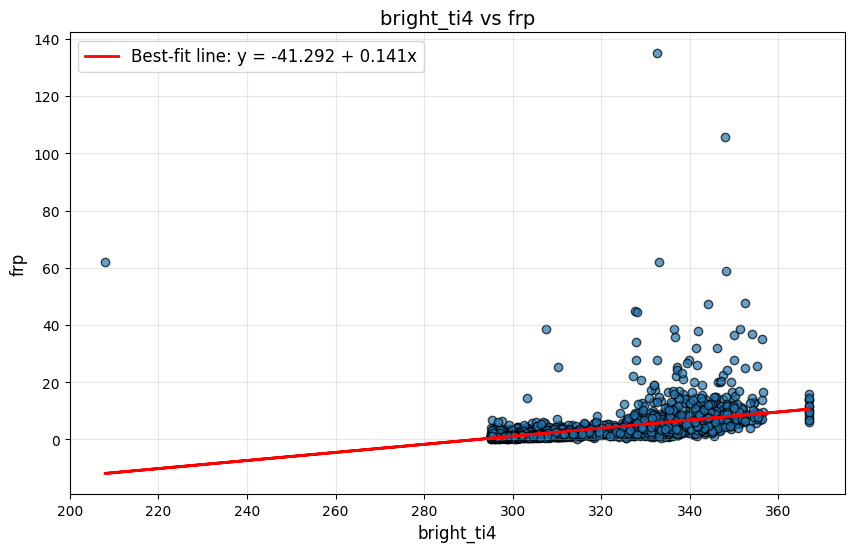

In [45]:
x = euro_c_df_clean['bright_ti4'].to_numpy()                    # x: bright_ti4
X = np.hstack([np.ones((x.shape[0], 1)), x.reshape(-1, 1)])     # X has a bias (1's) column
y = euro_c_df_clean['frp'].to_numpy()                           # y: frp

# solves (X^T X) m = (X^T y) for m
m = np.linalg.solve(np.matmul(X.T, X), np.matmul(X.T, y))

print(f'intercept = {round(m[0], 3)}, slope = {round(m[1], 3)}')

# scatterplot of frp vs bright_ti4 with best-fit line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7, edgecolor='k')
plt.plot(x, m[0] + m[1] * x, color='red', linewidth=2, label=f'Best-fit line: y = {round(m[0], 3)} + {round(m[1], 3)}x')  # Best-fit line
plt.title('bright_ti4 vs frp', fontsize=14)
plt.xlabel('bright_ti4', fontsize=12)
plt.ylabel('frp', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

intercept = -43.167, slope = 0.147


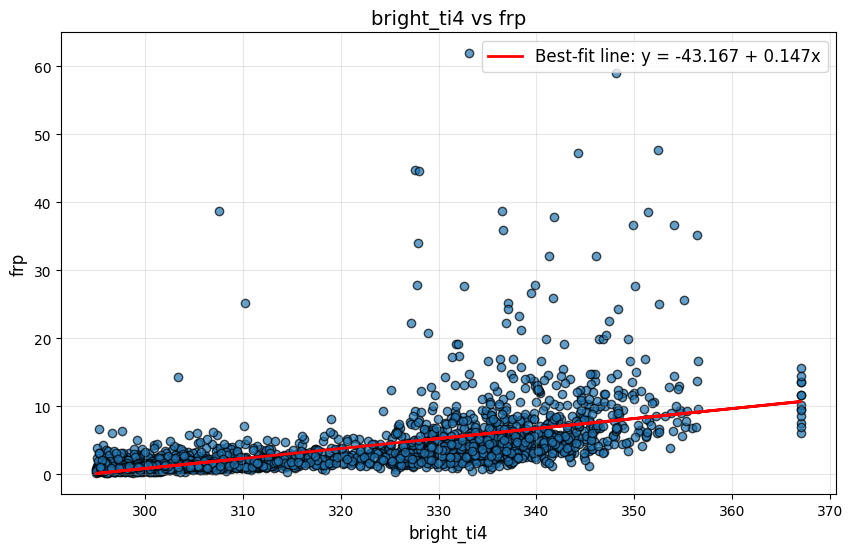

In [ ]:
# remove observations with bright_ti4 < 250 or frp > 100
outlier_indices = euro_c_df_clean[(euro_c_df_clean['bright_ti4'] < 250) |
                                  (euro_c_df_clean['frp'] > 100)].index
outliers_removed_df = euro_c_df_clean.drop(index=outlier_indices)

x = outliers_removed_df['bright_ti4'].to_numpy()                # x: bright_ti4
X = np.hstack([np.ones((x.shape[0], 1)), x.reshape(-1, 1)])     # X has a bias (1's) column
y = outliers_removed_df['frp'].to_numpy()                       # y: frp

# solves (X^T X) m = (X^T y) for m
m = np.linalg.solve(np.matmul(X.T, X), np.matmul(X.T, y))

print(f'intercept = {round(m[0], 3)}, slope = {round(m[1], 3)}')

# scatterplot of frp vs bright_ti4 with best-fit line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7, edgecolor='k')
plt.plot(x, m[0] + m[1] * x, color='red', linewidth=2, label=f'Best-fit line: y = {round(m[0], 3)} + {round(m[1], 3)}x')  # Best-fit line
plt.title('bright_ti4 vs frp', fontsize=14)
plt.xlabel('bright_ti4', fontsize=12)
plt.ylabel('frp', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()